# AIM: CATEGORIZING THE POSITIONS IN yi283_AATTGA.ATCGCGTTACGTCGT AS PSL5 OR PSL2

*Programmer's Note:*

This was the training notebook. All the code here is using the parental psl2 and psl5 strains for which we already know the outcomes of. Professor Yi used these to walk me through concepts and models related to our research and I could practice coding on this dataset in order to gain familiarity as well as have the ability to check my work on a known dataset. 

In [1]:
import os 
import allel
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Extract all CHROM 4 positions from yi283_AATTGA.ATCGCGTTACGTCGT

In [1]:
cd single-cell-LoH/tsv

[Errno 2] No such file or directory: 'single-cell-LoH/tsv'
/Users/anushasubramanian/Desktop/single-cell-LoH/notebooks


In [4]:
data = pd.read_csv('yi283_AATTGA.ATCGCGTTACGTCGT.tsv', sep = '\t')

In [5]:
data.head()

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,psl5.srt.bam,/net/shendure/vol10/projects/Tn5_scSeq/nobackup/alignment/yeast/Tom/bam/mem/psl2/psl2.sort.dedup.bam,yi283_AATTGA.ATCGCGTTACGTCGT.bam
0,chrI,242,.,A,C,17,.,"AMQ=53,27",GT:ADF:ADR:LTDROP,"1/1:3,11:0,6:.","0/0:42,0:17,0:.","./.:1,0:0,0:0"
1,chrI,250,.,G,A,20,.,"AMQ=49,22",GT:ADF:ADR:LTDROP,"1/1:7,14:1,6:.","0/0:53,0:19,0:.","./.:9,0:0,0:0"
2,chrI,262,.,A,G,23,.,"AMQ=47,28",GT:ADF:ADR:LTDROP,"0/1:14,17:6,2:.","0/0:48,2:13,0:.","./.:5,2:0,0:0"
3,chrI,286,.,A,T,98,.,"AMQ=57,32",GT:ADF:ADR:LTDROP,"1/1:0,32:0,24:.","0/1:32,23:26,17:.","./.:3,2:0,0:0"
4,chrI,290,.,A,T,39,.,"AMQ=46,39",GT:ADF:ADR:LTDROP,"1/0:10,24:6,15:.","0/0:56,0:41,0:.","./.:5,0:0,0:0"


In [6]:
chrIV = data.loc[data["#CHROM"] == "chrIV"] # all chrIV only

In [7]:
chrIV.head()

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,psl5.srt.bam,/net/shendure/vol10/projects/Tn5_scSeq/nobackup/alignment/yeast/Tom/bam/mem/psl2/psl2.sort.dedup.bam,yi283_AATTGA.ATCGCGTTACGTCGT.bam
2388,chrIV,1574,.,A,G,10,.,"AMQ=.,42",GT:ADF:ADR:LTDROP,"./.:0,6:0,2:.","./.:0,0:0,0:.","./.:0,2:0,0:0"
2389,chrIV,1607,.,T,C,10,.,"AMQ=41,38",GT:ADF:ADR:LTDROP,"0/1:30,3:11,7:.","./.:4,0:1,0:.","0/0:5,0:6,0:0"
2390,chrIV,1624,.,T,A,14,.,"AMQ=43,35",GT:ADF:ADR:LTDROP,"0/1:27,3:12,7:.","./.:0,3:0,1:.","0/0:5,0:8,0:0"
2391,chrIV,1633,.,T,G,54,.,"AMQ=.,42",GT:ADF:ADR:LTDROP,"1/1:0,22:0,19:.","./.:0,0:0,0:.","1/1:0,5:0,8:0"
2392,chrIV,1635,.,G,T,44,.,"AMQ=37,44",GT:ADF:ADR:LTDROP,"1/0:3,20:8,10:.","./.:3,0:1,0:.","1/1:0,5:0,9:0"


In [8]:
chrIV.columns

Index(['#CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT',
       'psl5.srt.bam',
       '/net/shendure/vol10/projects/Tn5_scSeq/nobackup/alignment/yeast/Tom/bam/mem/psl2/psl2.sort.dedup.bam',
       'yi283_AATTGA.ATCGCGTTACGTCGT.bam'],
      dtype='object')

In [9]:
chrIV.columns = ['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT',
       'psl5',
       'psl2',
       'yi283']
chrIV.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,psl5,psl2,yi283
2388,chrIV,1574,.,A,G,10,.,"AMQ=.,42",GT:ADF:ADR:LTDROP,"./.:0,6:0,2:.","./.:0,0:0,0:.","./.:0,2:0,0:0"
2389,chrIV,1607,.,T,C,10,.,"AMQ=41,38",GT:ADF:ADR:LTDROP,"0/1:30,3:11,7:.","./.:4,0:1,0:.","0/0:5,0:6,0:0"
2390,chrIV,1624,.,T,A,14,.,"AMQ=43,35",GT:ADF:ADR:LTDROP,"0/1:27,3:12,7:.","./.:0,3:0,1:.","0/0:5,0:8,0:0"
2391,chrIV,1633,.,T,G,54,.,"AMQ=.,42",GT:ADF:ADR:LTDROP,"1/1:0,22:0,19:.","./.:0,0:0,0:.","1/1:0,5:0,8:0"
2392,chrIV,1635,.,G,T,44,.,"AMQ=37,44",GT:ADF:ADR:LTDROP,"1/0:3,20:8,10:.","./.:3,0:1,0:.","1/1:0,5:0,9:0"


In [10]:
# chrIV = chrIV.rename(columns={"#CHROM": "CHROM", "psl5.srt.bam" : "psl5", 
#                       "/net/shendure/vol10/projects/Tn5_scSeq/nobackup/alignment/yeast/Tom/bam/mem/psl2/psl2.sort.dedup.bam" : "psl2", 
#              "yi283_AATTGA.ATCGCGTTACGTCGT.bam" : "yi283"})

## 2. Only use positions from sgs1

In [11]:
file = pd.read_csv('/Users/anushasubramanian/Desktop/Research/UCLA/yeast_parent_vcf/sgs1_as_csv.csv')
sgs1 = pd.DataFrame(file)
sgs1.head() #get all the correct positions chromosome numbers from sgs1

,CHROM,POS,GT1,GT2
0,chrI,101,1/1,0/0
1,chrI,177,1/1,0/0
2,chrI,192,1/1,0/0
3,chrI,194,1/1,0/0
4,chrI,242,1/1,0/0


In [12]:
keys = ["chrI","chrII","chrIII","chrIV","chrV","chrVI","chrVII","chrVIII","chrIX","chrX",
        "chrXI","chrXII","chrXIII","chrXIV", "chrXV","chrXVI","chrM"]
sgs1PosDict = dict.fromkeys(keys)

for k in sgs1PosDict:
    sgs1PosDict[k] = list(sgs1.loc[sgs1["CHROM"] == k]["POS"]) 

In [13]:
sgs1PosDict["chrIV"][:5]

[1647, 1875, 1993, 2002, 2256]

In [14]:
len(sgs1PosDict["chrIV"])

6741

In [15]:
len(chrIV["POS"])

2296

In [16]:
for pos in chrIV["POS"]:
    if pos not in sgs1PosDict["chrIV"]:
        chrIV.drop(chrIV.loc[chrIV["POS"] == pos].index, inplace = True)
len(chrIV["POS"]) 

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


2106

In [17]:
# positions 
extra = []
for pos in sgs1PosDict["chrIV"]:
    if chrIV["POS"].isin([pos]).any() == False: #if the chrIV position in sgs1 is not in any chrIV pos of yi283
        extra.append(pos) # add it to extra 

In [18]:
len(extra)

4635

In [19]:
chrIV.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,psl5,psl2,yi283
2393,chrIV,1647,.,C,T,36,.,"AMQ=.,43",GT:ADF:ADR:LTDROP,"1/1:0,15:0,8:.","./.:0,0:0,0:.","1/1:0,5:0,8:0"
2395,chrIV,5608,.,T,C,14,.,"AMQ=26,31",GT:ADF:ADR:LTDROP,"1/1:0,4:0,10:.","0/0:17,0:11,0:.","./.:1,0:0,0:0"
2396,chrIV,15005,.,A,G,68,.,"AMQ=22,25",GT:ADF:ADR:LTDROP,"1/1:0,25:0,36:.","0/0:6,0:12,0:.","./.:0,3:0,4:0"
2404,chrIV,18954,.,A,G,56,.,"AMQ=60,60",GT:ADF:ADR:LTDROP,"1/1:0,17:0,38:.","0/0:12,0:9,0:.","./.:0,1:0,0:0"
2405,chrIV,18989,.,G,C,45,.,"AMQ=60,60",GT:ADF:ADR:LTDROP,"1/1:0,16:0,25:.","0/0:6,0:7,0:.","./.:0,2:0,2:0"


## 3. Cleaning the yi283 data to be in usable form, with ref and alt reads separated

In [20]:
ref = []
alt = []
all_ref = []
all_alt = []

error = []
for item in chrIV["yi283"]:
    reads = item.split(sep = ':')[1:3]
    if len(reads) == 2:
        for read in reads:
            tokens = read.split(sep = ',')
            ref.append(tokens[0])
            alt.append(tokens[1])
        all_ref.append([int(x) for x in ref])
        all_alt.append([int(x) for x in alt])
        ref = []
        alt = []   
    else:
        error.append(item)


In [21]:
all_ref[:2]

[[0, 0], [1, 0]]

In [22]:
all_alt[:2]

[[5, 8], [0, 0]]

In [23]:
#Finding sum of the reference and alternative reads 
sum_ref = []
sum_alt = []

for ref in all_ref:
    sum_ref.append(sum(ref))
for alt in all_alt:
    sum_alt.append(sum(alt))

In [24]:
# finding the total number of reads by summing all ref and alts
zipped = zip(sum_ref, sum_alt)
tot_reads = [x+y for (x,y) in zipped]

In [25]:
cleaned_chrIV = pd.DataFrame()
cleaned_chrIV["CHROM"] = chrIV["CHROM"]
cleaned_chrIV["POS"] = chrIV["POS"]
cleaned_chrIV["total reads"] = tot_reads
cleaned_chrIV["ref reads"] = all_ref
cleaned_chrIV["alt reads"] = all_alt
cleaned_chrIV["sum_ref"] = sum_ref
cleaned_chrIV["sum_alt"] = sum_alt

## Here is your cleaned yi238 column reads

In [26]:
cleaned_chrIV.head()

,CHROM,POS,total reads,ref reads,alt reads,sum_ref,sum_alt
2393,chrIV,1647,13,"[0, 0]","[5, 8]",0,13
2395,chrIV,5608,1,"[1, 0]","[0, 0]",1,0
2396,chrIV,15005,7,"[0, 0]","[3, 4]",0,7
2404,chrIV,18954,1,"[0, 0]","[1, 0]",0,1
2405,chrIV,18989,4,"[0, 0]","[2, 2]",0,4


## 4. Find percentage of alt and reference 

**You are have to make sure you are NOT dividing by zero - a situation when there are no reads. This particular file doesn't seem to have it, except in psl2, but you have to CHECK in every FILE after this.
Or atleast maintain the CHECK**

In [27]:
# percentage of ref = sum ref / total reads

refPer = []
altPer = []

for ref, reads in zip(sum_ref, tot_reads):
    refPer.append((ref/reads)*100)
for alt, reads in zip(sum_alt, tot_reads):
    altPer.append((alt/reads)*100)

cleaned_chrIV["%ref"] = refPer
cleaned_chrIV["%alt"] = altPer

cleaned_chrIV.head()



,CHROM,POS,total reads,ref reads,alt reads,sum_ref,sum_alt,%ref,%alt
2393,chrIV,1647,13,"[0, 0]","[5, 8]",0,13,0.0,100.0
2395,chrIV,5608,1,"[1, 0]","[0, 0]",1,0,100.0,0.0
2396,chrIV,15005,7,"[0, 0]","[3, 4]",0,7,0.0,100.0
2404,chrIV,18954,1,"[0, 0]","[1, 0]",0,1,0.0,100.0
2405,chrIV,18989,4,"[0, 0]","[2, 2]",0,4,0.0,100.0


In [28]:
final = cleaned_chrIV.loc[(cleaned_chrIV["%ref"] != 0) & (cleaned_chrIV["%ref"] != 100)]
final.head() #all your heterozygous loci

,CHROM,POS,total reads,ref reads,alt reads,sum_ref,sum_alt,%ref,%alt
2486,chrIV,59773,4,"[3, 0]","[0, 1]",3,1,75.000000,25.000000
2587,chrIV,94417,5,"[1, 0]","[0, 4]",1,4,20.000000,80.000000
2636,chrIV,109355,7,"[0, 1]","[4, 2]",1,6,14.285714,85.714286
2792,chrIV,201039,4,"[2, 1]","[0, 1]",3,1,75.000000,25.000000
2807,chrIV,211126,2,"[1, 0]","[1, 0]",1,1,50.000000,50.000000


In [29]:
# quick check to make sure that all the entries are either 0 or 100
error = False
for alt in altPer:
    if alt!=0 and alt!=100:
        error = True
print(error)

True


In [30]:
#reset the index so we can access multiple columns of df
cleaned_chrIV.reset_index(drop = True, inplace=True)

In [31]:
cleaned_chrIV.head()

,CHROM,POS,total reads,ref reads,alt reads,sum_ref,sum_alt,%ref,%alt
0,chrIV,1647,13,"[0, 0]","[5, 8]",0,13,0.0,100.0
1,chrIV,5608,1,"[1, 0]","[0, 0]",1,0,100.0,0.0
2,chrIV,15005,7,"[0, 0]","[3, 4]",0,7,0.0,100.0
3,chrIV,18954,1,"[0, 0]","[1, 0]",0,1,0.0,100.0
4,chrIV,18989,4,"[0, 0]","[2, 2]",0,4,0.0,100.0


## 5. Classify each position as alt or ref

In [32]:
#this should be a function and not a for loop
classify = [] 
for ind in cleaned_chrIV.index:
    if cleaned_chrIV["%ref"][ind] > cleaned_chrIV["%alt"][ind]:
        classify.append("ref")
    elif cleaned_chrIV["%alt"][ind] > cleaned_chrIV["%ref"][ind]:
        classify.append("alt")
    else:
        classify.append('ref/alt')

In [33]:
len(classify)

2106

In [34]:
cleaned_chrIV["pos classification"] = classify

In [35]:
cleaned_chrIV.head()

,CHROM,POS,total reads,ref reads,alt reads,sum_ref,sum_alt,%ref,%alt,pos classification
0,chrIV,1647,13,"[0, 0]","[5, 8]",0,13,0.0,100.0,alt
1,chrIV,5608,1,"[1, 0]","[0, 0]",1,0,100.0,0.0,ref
2,chrIV,15005,7,"[0, 0]","[3, 4]",0,7,0.0,100.0,alt
3,chrIV,18954,1,"[0, 0]","[1, 0]",0,1,0.0,100.0,alt
4,chrIV,18989,4,"[0, 0]","[2, 2]",0,4,0.0,100.0,alt


In [36]:
chrIV.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,psl5,psl2,yi283
2393,chrIV,1647,.,C,T,36,.,"AMQ=.,43",GT:ADF:ADR:LTDROP,"1/1:0,15:0,8:.","./.:0,0:0,0:.","1/1:0,5:0,8:0"
2395,chrIV,5608,.,T,C,14,.,"AMQ=26,31",GT:ADF:ADR:LTDROP,"1/1:0,4:0,10:.","0/0:17,0:11,0:.","./.:1,0:0,0:0"
2396,chrIV,15005,.,A,G,68,.,"AMQ=22,25",GT:ADF:ADR:LTDROP,"1/1:0,25:0,36:.","0/0:6,0:12,0:.","./.:0,3:0,4:0"
2404,chrIV,18954,.,A,G,56,.,"AMQ=60,60",GT:ADF:ADR:LTDROP,"1/1:0,17:0,38:.","0/0:12,0:9,0:.","./.:0,1:0,0:0"
2405,chrIV,18989,.,G,C,45,.,"AMQ=60,60",GT:ADF:ADR:LTDROP,"1/1:0,16:0,25:.","0/0:6,0:7,0:.","./.:0,2:0,2:0"


In [37]:
chrIV.drop(columns=["ID","REF","ALT","QUAL","FILTER"], inplace=True)

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [38]:
chrIV.head()

,CHROM,POS,INFO,FORMAT,psl5,psl2,yi283
2393,chrIV,1647,"AMQ=.,43",GT:ADF:ADR:LTDROP,"1/1:0,15:0,8:.","./.:0,0:0,0:.","1/1:0,5:0,8:0"
2395,chrIV,5608,"AMQ=26,31",GT:ADF:ADR:LTDROP,"1/1:0,4:0,10:.","0/0:17,0:11,0:.","./.:1,0:0,0:0"
2396,chrIV,15005,"AMQ=22,25",GT:ADF:ADR:LTDROP,"1/1:0,25:0,36:.","0/0:6,0:12,0:.","./.:0,3:0,4:0"
2404,chrIV,18954,"AMQ=60,60",GT:ADF:ADR:LTDROP,"1/1:0,17:0,38:.","0/0:12,0:9,0:.","./.:0,1:0,0:0"
2405,chrIV,18989,"AMQ=60,60",GT:ADF:ADR:LTDROP,"1/1:0,16:0,25:.","0/0:6,0:7,0:.","./.:0,2:0,2:0"


## 6. Get whether positions are alt or ref for PSL5

In [39]:
ref5 = []
alt5 = []
all_ref5 = []
all_alt5 = []

error = []
for item in chrIV["psl5"]:
    reads = item.split(sep = ':')[1:3]
    if len(reads) == 2:
        for read in reads:
            tokens = read.split(sep = ',')
            ref5.append(tokens[0])
            alt5.append(tokens[1])
        all_ref5.append([int(x) for x in ref5])
        all_alt5.append([int(x) for x in alt5])
        ref5 = []
        alt5 = []   
    else:
        error.append(item)

In [40]:
all_ref5[:2]

[[0, 0], [0, 0]]

In [41]:
all_alt5[:2]

[[15, 8], [4, 10]]

In [42]:
#Finding sum of the reference and alternative reads in psl5
sum_ref5 = []
sum_alt5 = []

for ref in all_ref5:
    sum_ref5.append(sum(ref))
for alt in all_alt5:
    sum_alt5.append(sum(alt))

In [43]:
# finding the total number of reads by summing all ref and alts
zipped = zip(sum_ref5, sum_alt5)
tot_reads5 = [x+y for (x,y) in zipped]

In [44]:
tot_reads5[:2]

[23, 14]

In [45]:
# percentage of ref = sum ref / total reads

refPer5 = []
altPer5 = []

for ref, reads in zip(sum_ref5, tot_reads5):
    refPer5.append((ref/reads)*100)
for alt, reads in zip(sum_alt5, tot_reads5):
    altPer5.append((alt/reads)*100)

In [46]:
len(altPer5)

2106

In [47]:
# quick check to make sure that all the entries are either 0 or 100
error = False
for ref in refPer5:
    if ref!=0 and ref!=100:
        error = True
print(error)

True


In [48]:
classify5 = []
for alt,ref in zip(altPer5, refPer5):
    if ref > alt:
        classify5.append("ref")
    elif alt > ref:
        classify5.append("alt")
    else:
        classify5.append('ref/alt')
len(classify5)

2106

In [49]:
refPer5[:2]

[0.0, 0.0]

In [50]:
classify5[:2]

['alt', 'alt']

In [51]:
cleaned_chrIV["psl5 pos"] = classify5

## 7. Get whether positions are alt or ref for PSL2

In [52]:
chrIV.head()

,CHROM,POS,INFO,FORMAT,psl5,psl2,yi283
2393,chrIV,1647,"AMQ=.,43",GT:ADF:ADR:LTDROP,"1/1:0,15:0,8:.","./.:0,0:0,0:.","1/1:0,5:0,8:0"
2395,chrIV,5608,"AMQ=26,31",GT:ADF:ADR:LTDROP,"1/1:0,4:0,10:.","0/0:17,0:11,0:.","./.:1,0:0,0:0"
2396,chrIV,15005,"AMQ=22,25",GT:ADF:ADR:LTDROP,"1/1:0,25:0,36:.","0/0:6,0:12,0:.","./.:0,3:0,4:0"
2404,chrIV,18954,"AMQ=60,60",GT:ADF:ADR:LTDROP,"1/1:0,17:0,38:.","0/0:12,0:9,0:.","./.:0,1:0,0:0"
2405,chrIV,18989,"AMQ=60,60",GT:ADF:ADR:LTDROP,"1/1:0,16:0,25:.","0/0:6,0:7,0:.","./.:0,2:0,2:0"


In [53]:
ref2 = []
alt2 = []
all_ref2 = []
all_alt2 = []

error = []
for item in chrIV["psl2"]:
    reads = item.split(sep = ':')[1:3]
    if len(reads) == 2:
        for read in reads:
            tokens = read.split(sep = ',')
            ref2.append(tokens[0])
            alt2.append(tokens[1])
        all_ref2.append([int(x) for x in ref2])
        all_alt2.append([int(x) for x in alt2])
        ref2 = []
        alt2 = []   
    else:
        error.append(item)

In [54]:
all_ref2[:2]

[[0, 0], [17, 11]]

In [55]:
all_alt2[:2]

[[0, 0], [0, 0]]

In [56]:
#Finding sum of the reference and alternative reads in psl5
sum_ref2 = []
sum_alt2 = []

for ref in all_ref2:
    sum_ref2.append(sum(ref))
for alt in all_alt2:
    sum_alt2.append(sum(alt))

In [57]:
sum_ref2[:2]

[0, 28]

In [58]:
# finding the total number of reads by summing all ref and alts
zipped = zip(sum_ref2, sum_alt2)
tot_reads2 = [x+y for (x,y) in zipped]

In [59]:
tot_reads2[:2]

[0, 28]

In [60]:
# percentage of ref = sum ref / total reads

refPer2 = []
altPer2 = []

for ref, reads in zip(sum_ref2, tot_reads2):
    if reads!= 0:
        refPer2.append((ref/reads)*100)
    else:
        refPer2.append(999)
        
for alt, reads in zip(sum_alt2, tot_reads2):
    if reads!= 0:
        altPer2.append((alt/reads)*100)
    else:
        altPer2.append(999)

In [61]:
len(altPer2)

2106

In [62]:
# quick check to make sure that all the entries are either 0 or 100
error = False
for ref in refPer2:
    if ref!=0 and ref!=100:
        error=True
print(error)

True


In [63]:
classify2 = []
for alt,ref in zip(altPer2, refPer2):
    if ref > alt:
        classify2.append("ref")
    elif alt > ref:
        classify2.append("alt")
    elif alt == 999 and ref == 999:
        classify2.append('no reads')
    else:
        classify2.append('ref/alt')
len(classify2)

2106

In [64]:
refPer2[:2]

[999, 100.0]

In [65]:
altPer2[:2]

[999, 0.0]

In [66]:
classify2[:2]

['no reads', 'ref']

In [67]:
cleaned_chrIV["psl2 pos"] = classify2

In [68]:
cleaned_chrIV.head()

,CHROM,POS,total reads,ref reads,alt reads,sum_ref,sum_alt,%ref,%alt,pos classification,psl5 pos,psl2 pos
0,chrIV,1647,13,"[0, 0]","[5, 8]",0,13,0.0,100.0,alt,alt,no reads
1,chrIV,5608,1,"[1, 0]","[0, 0]",1,0,100.0,0.0,ref,alt,ref
2,chrIV,15005,7,"[0, 0]","[3, 4]",0,7,0.0,100.0,alt,alt,ref
3,chrIV,18954,1,"[0, 0]","[1, 0]",0,1,0.0,100.0,alt,alt,ref
4,chrIV,18989,4,"[0, 0]","[2, 2]",0,4,0.0,100.0,alt,alt,ref


## 8. So what strain is the yi283 position from?

In [69]:
cleaned_chrIV.loc[cleaned_chrIV["pos classification"] == 'ref/alt']

,CHROM,POS,total reads,ref reads,alt reads,sum_ref,sum_alt,%ref,%alt,pos classification,psl5 pos,psl2 pos
376,chrIV,211126,2,"[1, 0]","[1, 0]",1,1,50.0,50.0,ref/alt,alt,ref
377,chrIV,211275,4,"[0, 2]","[1, 1]",2,2,50.0,50.0,ref/alt,alt,ref
392,chrIV,215266,2,"[1, 0]","[0, 1]",1,1,50.0,50.0,ref/alt,alt,ref
418,chrIV,224747,2,"[1, 0]","[1, 0]",1,1,50.0,50.0,ref/alt,alt,ref
448,chrIV,242001,2,"[0, 1]","[0, 1]",1,1,50.0,50.0,ref/alt,alt,ref
475,chrIV,266407,4,"[2, 0]","[0, 2]",2,2,50.0,50.0,ref/alt,alt,ref
588,chrIV,346843,2,"[0, 1]","[1, 0]",1,1,50.0,50.0,ref/alt,alt,ref
657,chrIV,380580,2,"[1, 0]","[1, 0]",1,1,50.0,50.0,ref/alt,ref,alt
715,chrIV,408095,2,"[1, 0]","[0, 1]",1,1,50.0,50.0,ref/alt,ref,alt
736,chrIV,422280,2,"[1, 0]","[1, 0]",1,1,50.0,50.0,ref/alt,alt,ref


In [70]:
cleaned_chrIV.head()

,CHROM,POS,total reads,ref reads,alt reads,sum_ref,sum_alt,%ref,%alt,pos classification,psl5 pos,psl2 pos
0,chrIV,1647,13,"[0, 0]","[5, 8]",0,13,0.0,100.0,alt,alt,no reads
1,chrIV,5608,1,"[1, 0]","[0, 0]",1,0,100.0,0.0,ref,alt,ref
2,chrIV,15005,7,"[0, 0]","[3, 4]",0,7,0.0,100.0,alt,alt,ref
3,chrIV,18954,1,"[0, 0]","[1, 0]",0,1,0.0,100.0,alt,alt,ref
4,chrIV,18989,4,"[0, 0]","[2, 2]",0,4,0.0,100.0,alt,alt,ref


In [71]:
strain = []
for ind in cleaned_chrIV.index:
    if cleaned_chrIV["pos classification"][ind] == 'ref/alt':
        strain.append('psl5/psl2')
    else:
        if cleaned_chrIV["pos classification"][ind] == cleaned_chrIV["psl5 pos"][ind]:
            strain.append("psl5")
            
        elif cleaned_chrIV["pos classification"][ind] == cleaned_chrIV["psl2 pos"][ind]:
            strain.append("psl2")
        else:
            strain.append("inconclusive")

In [72]:
len(strain)

2106

In [73]:
cleaned_chrIV["strain"] = strain

In [74]:
cleaned_chrIV.head()

,CHROM,POS,total reads,ref reads,alt reads,sum_ref,sum_alt,%ref,%alt,pos classification,psl5 pos,psl2 pos,strain
0,chrIV,1647,13,"[0, 0]","[5, 8]",0,13,0.0,100.0,alt,alt,no reads,psl5
1,chrIV,5608,1,"[1, 0]","[0, 0]",1,0,100.0,0.0,ref,alt,ref,psl2
2,chrIV,15005,7,"[0, 0]","[3, 4]",0,7,0.0,100.0,alt,alt,ref,psl5
3,chrIV,18954,1,"[0, 0]","[1, 0]",0,1,0.0,100.0,alt,alt,ref,psl5
4,chrIV,18989,4,"[0, 0]","[2, 2]",0,4,0.0,100.0,alt,alt,ref,psl5


In [75]:
all_ref2[204]

[14, 12]

In [76]:
all_alt2[204]

[0, 1]

In [77]:
tot_reads2[204]

27

In [78]:
classify2[204]

'ref'

In [79]:
sum_ref2[204]

26

In [80]:
cleaned_chrIV.loc[cleaned_chrIV["strain"] == 'inconclusive']

,CHROM,POS,total reads,ref reads,alt reads,sum_ref,sum_alt,%ref,%alt,pos classification,psl5 pos,psl2 pos,strain


In [81]:
psl5Per = []
psl2Per = []

for ind in cleaned_chrIV.index:
    
    if cleaned_chrIV["strain"][ind] == 'psl5/psl2':
        psl5Per.append(cleaned_chrIV["%ref"][ind])
        psl2Per.append(cleaned_chrIV["%alt"][ind])
        
    elif cleaned_chrIV["strain"][ind] == "psl5":
        
        if cleaned_chrIV["pos classification"][ind] == 'alt':
            psl5Per.append(cleaned_chrIV["%alt"][ind])
            psl2Per.append(cleaned_chrIV["%ref"][ind])
            
        elif cleaned_chrIV["pos classification"][ind] == 'ref':
            psl5Per.append(cleaned_chrIV["%ref"][ind])
            psl2Per.append(cleaned_chrIV["%alt"][ind])
            
    elif cleaned_chrIV["strain"][ind] == "psl2":
        
        if cleaned_chrIV["pos classification"][ind] == 'alt':
            psl2Per.append(cleaned_chrIV["%alt"][ind])
            psl5Per.append(cleaned_chrIV["%ref"][ind])
            
        elif cleaned_chrIV["pos classification"][ind] == 'ref':
            psl2Per.append(cleaned_chrIV["%ref"][ind])
            psl5Per.append(cleaned_chrIV["%alt"][ind])
            
    elif cleaned_chrIV["strain"][ind] == 'inconclusive':
        psl5Per.append(-1)
        psl2Per.append(-1)

In [82]:
psl2Per[:5]

[0.0, 100.0, 0.0, 0.0, 0.0]

In [83]:
len(psl5Per)

2106

In [84]:
cleaned_chrIV["psl5%"] = psl5Per
cleaned_chrIV["psl2%"] = psl2Per
cleaned_chrIV.head()

,CHROM,POS,total reads,ref reads,alt reads,sum_ref,sum_alt,%ref,%alt,pos classification,psl5 pos,psl2 pos,strain,psl5%,psl2%
0,chrIV,1647,13,"[0, 0]","[5, 8]",0,13,0.0,100.0,alt,alt,no reads,psl5,100.0,0.0
1,chrIV,5608,1,"[1, 0]","[0, 0]",1,0,100.0,0.0,ref,alt,ref,psl2,0.0,100.0
2,chrIV,15005,7,"[0, 0]","[3, 4]",0,7,0.0,100.0,alt,alt,ref,psl5,100.0,0.0
3,chrIV,18954,1,"[0, 0]","[1, 0]",0,1,0.0,100.0,alt,alt,ref,psl5,100.0,0.0
4,chrIV,18989,4,"[0, 0]","[2, 2]",0,4,0.0,100.0,alt,alt,ref,psl5,100.0,0.0


In [85]:
cleaned_chrIV.loc[cleaned_chrIV["psl5%"]!= 100]

,CHROM,POS,total reads,ref reads,alt reads,sum_ref,sum_alt,%ref,%alt,pos classification,psl5 pos,psl2 pos,strain,psl5%,psl2%
1,chrIV,5608,1,"[1, 0]","[0, 0]",1,0,100.0,0.0,ref,alt,ref,psl2,0.0,100.0
84,chrIV,59773,4,"[3, 0]","[0, 1]",3,1,75.0,25.0,ref,alt,ref,psl2,25.0,75.0
180,chrIV,94417,5,"[1, 0]","[0, 4]",1,4,20.0,80.0,alt,alt,ref,psl5,80.0,20.0
181,chrIV,94538,1,"[0, 1]","[0, 0]",1,0,100.0,0.0,ref,alt,ref,psl2,0.0,100.0
182,chrIV,94648,1,"[0, 1]","[0, 0]",1,0,100.0,0.0,ref,alt,ref,psl2,0.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2079,chrIV,1520921,1,"[1, 0]","[0, 0]",1,0,100.0,0.0,ref,alt,ref,psl2,0.0,100.0
2080,chrIV,1521081,1,"[0, 1]","[0, 0]",1,0,100.0,0.0,ref,alt,ref,psl2,0.0,100.0
2081,chrIV,1521084,1,"[0, 1]","[0, 0]",1,0,100.0,0.0,ref,alt,ref,psl2,0.0,100.0
2102,chrIV,1524207,1,"[0, 1]","[0, 0]",1,0,100.0,0.0,ref,alt,ref,psl2,0.0,100.0


## Plotting PSL5% for every position

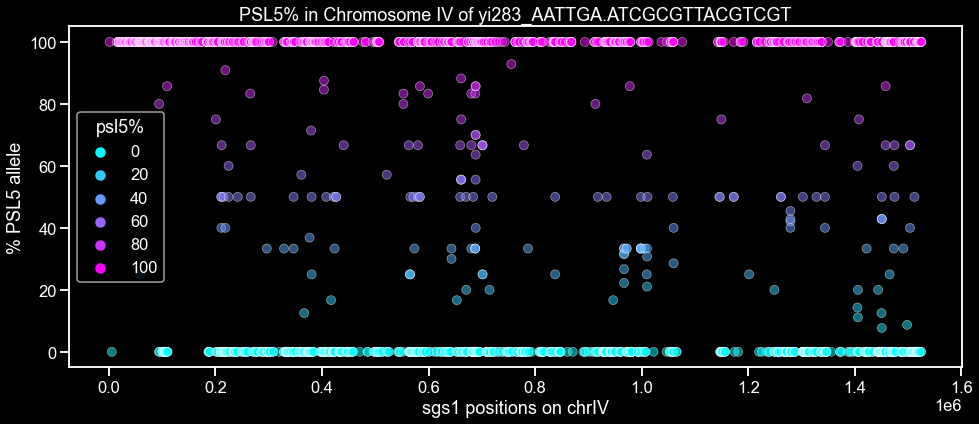

In [86]:
sns.set(rc={'figure.figsize':(16,6.27)})
sns.set(style="ticks", context="talk")
plt.style.use('dark_background')
sns.scatterplot(x = "POS",
                   y = "psl5%",
                   hue = "psl5%",
                    palette = 'cool',
                   data = cleaned_chrIV,
                   alpha = 0.5
             )

plt.title("PSL5% in Chromosome IV of yi283_AATTGA.ATCGCGTTACGTCGT");
plt.xlabel("sgs1 positions on chrIV")
plt.ylabel("% PSL5 allele")
plt.savefig('/Users/anushasubramanian/Desktop/PSL5% of yi283.png', dpi = 180, bbox_inches='tight')

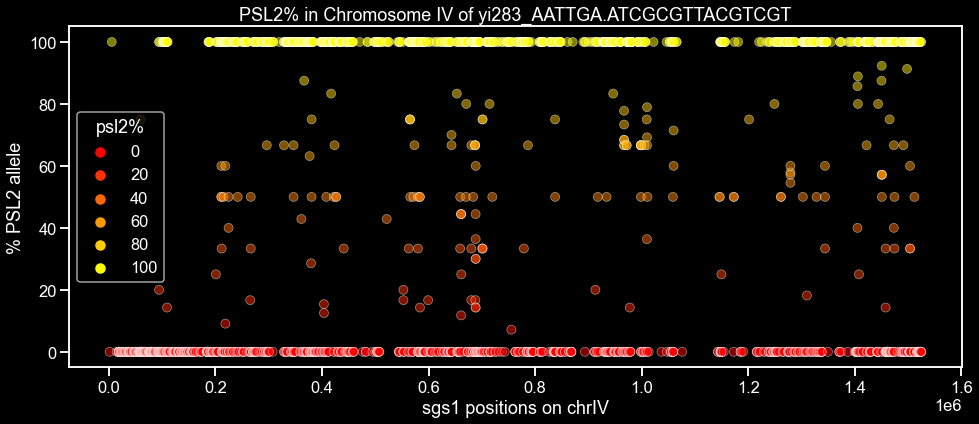

In [87]:
sns.scatterplot(x = "POS",
                   y = "psl2%",
                   hue = "psl2%",
                    palette = 'autumn',
                   data = cleaned_chrIV,
                   alpha = 0.5
             )

plt.title("PSL2% in Chromosome IV of yi283_AATTGA.ATCGCGTTACGTCGT");
plt.xlabel("sgs1 positions on chrIV")
plt.ylabel("% PSL2 allele")
plt.savefig('/Users/anushasubramanian/Desktop/PSL2% of yi283.png', dpi = 180, bbox_inches='tight')

# FUNCTION FOR FINDING HOW MANY TIMES A POSITION IN SGS1 APPEARS IN THE ~7700 SINGLE CELLS

In [94]:
pwd

'/Users/anushasubramanian/Desktop/Research/UCLA/tsv'

In [95]:
len(os.listdir())

7704

In [96]:
sgs1PosDict["chrIV"][:5]

[1647, 1875, 1993, 2002, 2256]

In [97]:
# each position in chrIV of sgs1 is a key in a dictionary
chrIVPos = dict.fromkeys(list(sgs1PosDict["chrIV"]), 0)

In [98]:
pwd

'/Users/anushasubramanian/Desktop/Research/UCLA/tsv'

In [99]:
for file in os.listdir():
    if file.find(".tsv") != -1:
        data = pd.read_csv(file, sep = '\t')
        vcf = data.loc[data["#CHROM"] == "chrIV"]
        for pos in vcf["POS"]:
            if pos in chrIVPos.keys():
                chrIVPos[pos] += 1
 

In [100]:
df = pd.DataFrame()
df["POS"] = chrIVPos.keys()
df["freq"] = chrIVPos.values()

In [102]:
df.to_csv('/Users/anushasubramanian/Desktop/# of times a sgs1 position appears in ChrIV.csv', index = False)

## HISTOGRAM DISTRIBUTION OF POSITION REPRESENTATION

In [ ]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.set(style="ticks", context="talk")

sns.distplot(df["freq"], bins = 100, color = "deeppink", kde = False)

plt.title("How many times each position in chrIV of sgs1 appears in chrIV of 7704 single cells");
plt.xlabel("# of times a position is represented")
plt.ylabel("# of positions")
plt.savefig('/Users/anushasubramanian/Desktop/ChrIV pos distribution.png', dpi = 180, bbox_inches='tight')

In [ ]:
df.head()

## Bar chart of how many times each position is represented

In [ ]:
sns.set(rc={'figure.figsize':(20,600)})
sns.set(style="ticks", context="talk")
plt.style.use('dark_background')

sns.barplot(x = "freq", y = "POS", data = df, orient = "h");
plt.title("How many times each position in chrIV of sgs1 appears in chrIV of 7704 single cells");
plt.ylabel("sgs1 positions")
plt.xlabel("# of times they appear")
plt.yticks(size = 2)
plt.savefig('/Users/anushasubramanian/Desktop/ChrIV bar chart pos freq.png', bbox_inches='tight')